In [1]:
%matplotlib inline

import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import tree
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

from sklearn.naive_bayes import GaussianNB

from sklearn.svm import SVC

#import neural_network as nn
from sklearn.neural_network import MLPClassifier

from pyspark.sql import SparkSession


import sqlite3
connection = sqlite3.connect("./database/bdfinal.sql")

In [2]:
oneHotEncoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
labelEncoder = LabelEncoder()

## 1º Try - The most basic model possible

In [145]:
query = "select teams.tmID as tmID, playerID, teams.year as year, playoff from players_teams join teams \
on teams.tmID = players_teams.tmID and teams.year = players_teams.year order by teams.year, teams.name ;"

df = pd.read_sql(query, connection)
categorical_columns = ["tmID", "playerID"]

for col in categorical_columns:
    df[col] = labelEncoder.fit_transform(df[col].astype('str'))
    
# replace 'Y' and 'N' with 1 and 0 in the playoff column
df["playoff"] = df["playoff"].replace("Y", 1)
df["playoff"] = df["playoff"].replace("N", 0)
    
print(df.head())
    
# split the data into train and test

train_df = df[df["year"] != 10]

train_inputs = train_df.iloc[:, :-1].values
train_labels = train_df.iloc[:, -1].values
    
test_df = df[df["year"] == 10]

print(test_df)

test_inputs = test_df.iloc[:, :-1].values
test_labels = test_df.iloc[:, -1].values


   tmID  playerID  year  playoff
0     1        34     1        0
1     1        59     1        0
2     1       138     1        0
3     1       139     1        0
4     1       208     1        0
      tmID  playerID  year  playoff
1711     0        85    10        1
1712     0       122    10        1
1713     0       213    10        1
1714     0       262    10        1
1715     0       269    10        1
...    ...       ...   ...      ...
1871    19       266    10        1
1872    19       298    10        1
1873    19       320    10        1
1874    19       339    10        1
1875    19       411    10        1

[165 rows x 4 columns]


### Decision Tree Algorithm

Accuracy: 0.5454545454545454
Precision: 0.6310679611650486
Recall: 0.6372549019607843
F1: 0.6341463414634146
Confusion matrix:
[[25 38]
 [37 65]]


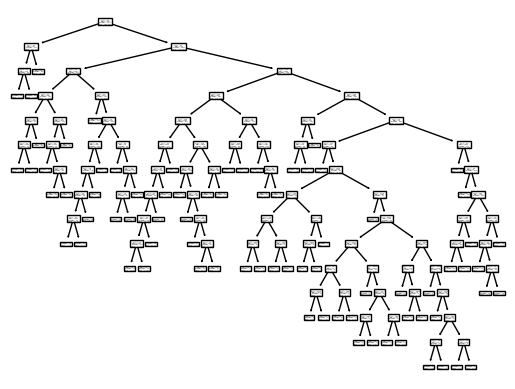

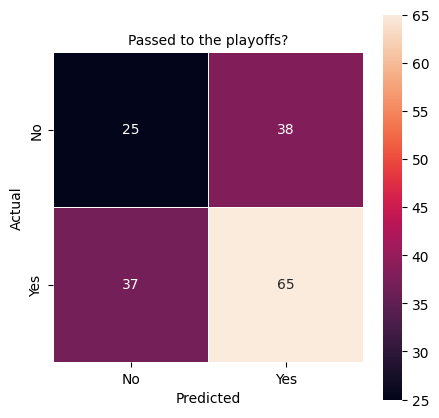

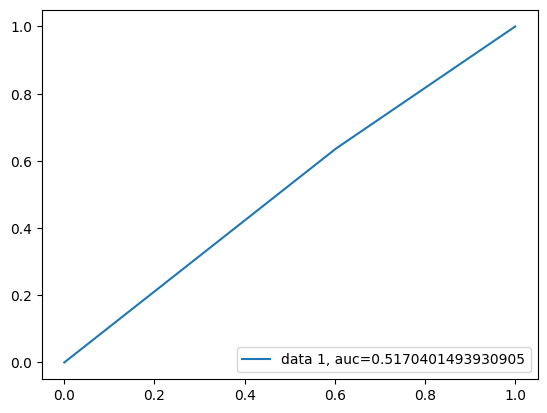

In [146]:
clf = DecisionTreeClassifier(random_state=1)
clf.fit(train_inputs,train_labels)


tree.plot_tree(clf)

# metrics for the decision tree
y_pred = clf.predict(test_inputs)
print("Accuracy:",metrics.accuracy_score(test_labels, y_pred))
print("Precision:",metrics.precision_score(test_labels, y_pred))
print("Recall:",metrics.recall_score(test_labels, y_pred))
print("F1:",metrics.f1_score(test_labels, y_pred))

# confusion matrix
confusion = confusion_matrix(test_labels, y_pred)
print(f"Confusion matrix:\n{confusion}")

#plot confusion matrix
plt.figure(figsize=(5,5))
sb.heatmap(confusion, annot=True, fmt="g", linewidths=.5, square = True, xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
all_sample_title = 'Passed to the playoffs?'
plt.title(all_sample_title, size = 10)
plt.show()

# roc curve
y_pred_proba = clf.predict_proba(test_inputs)[::,1]
fpr, tpr, _ = metrics.roc_curve(test_labels,  y_pred_proba)
auc = metrics.roc_auc_score(test_labels, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

### Logistic Regression 

Accuracy: 0.62
Precision: 0.62
Recall: 1.00
F1: 0.76


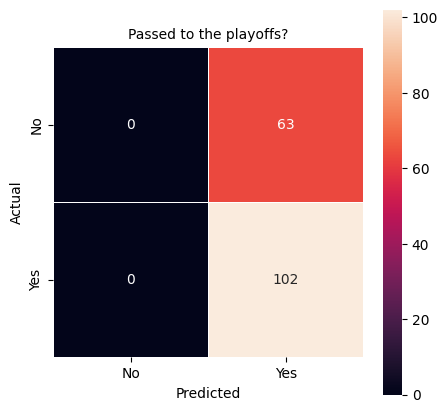

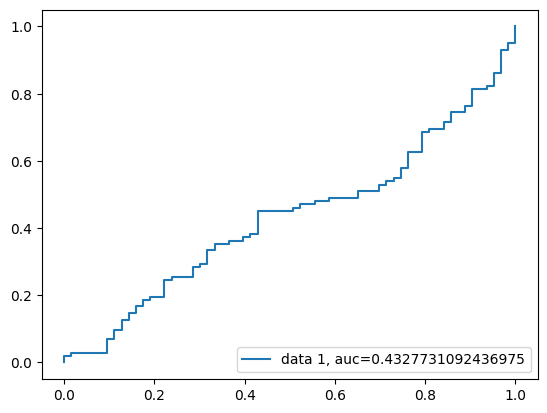

In [144]:
logreg = LogisticRegression(max_iter=1000)
logreg.fit(train_inputs, train_labels)

y_pred = logreg.predict(test_inputs)

# metrics for the logistic regression
accuracy = accuracy_score(test_labels, y_pred)
print(f"Accuracy: {accuracy:.2f}")
precision = metrics.precision_score(test_labels, y_pred)
print(f"Precision: {precision:.2f}")
recall = metrics.recall_score(test_labels, y_pred)
print(f"Recall: {recall:.2f}")
f1 = metrics.f1_score(test_labels, y_pred)
print(f"F1: {f1:.2f}")

# plot the confusion matrix
confusion = confusion_matrix(test_labels, y_pred)

plt.figure(figsize=(5,5))
sb.heatmap(confusion, annot=True, fmt="g", linewidths=.5, square = True, xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
all_sample_title = 'Passed to the playoffs?'

plt.title(all_sample_title, size = 10)
plt.show()

# roc curve
y_pred_proba = logreg.predict_proba(test_inputs)[::,1]
fpr, tpr, _ = metrics.roc_curve(test_labels,  y_pred_proba)
auc = metrics.roc_auc_score(test_labels, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

## Naive Bayes

Accuracy: 0.62
Precision: 0.62
Recall: 1.00
F1: 0.76


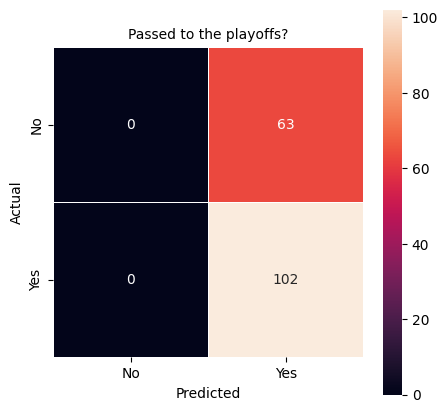

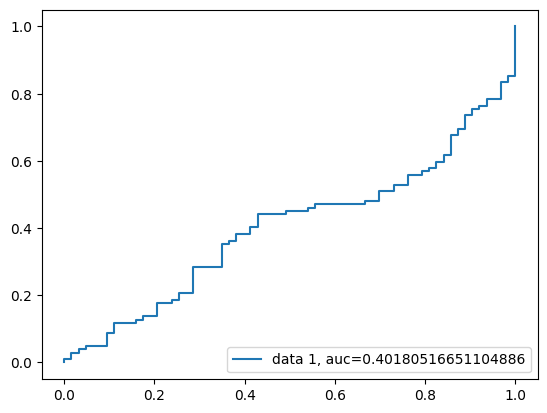

In [147]:
# Naive Bayes
gnb = GaussianNB()
gnb.fit(train_inputs, train_labels)

y_pred = gnb.predict(test_inputs)

# metrics for the naive bayes
accuracy = accuracy_score(test_labels, y_pred)
print(f"Accuracy: {accuracy:.2f}")
precision = metrics.precision_score(test_labels, y_pred)
print(f"Precision: {precision:.2f}")
recall = metrics.recall_score(test_labels, y_pred)
print(f"Recall: {recall:.2f}")
f1 = metrics.f1_score(test_labels, y_pred)
print(f"F1: {f1:.2f}")

# plot the confusion matrix
confusion = confusion_matrix(test_labels, y_pred)

plt.figure(figsize=(5,5))
sb.heatmap(confusion, annot=True, fmt="g", linewidths=.5, square = True, xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
all_sample_title = 'Passed to the playoffs?'

plt.title(all_sample_title, size = 10)
plt.show()

# roc curve
y_pred_proba = gnb.predict_proba(test_inputs)[::,1]
fpr, tpr, _ = metrics.roc_curve(test_labels,  y_pred_proba)
auc = metrics.roc_auc_score(test_labels, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

## Support Vector Machine

Accuracy: 0.62
Precision: 0.62
Recall: 1.00
F1: 0.76


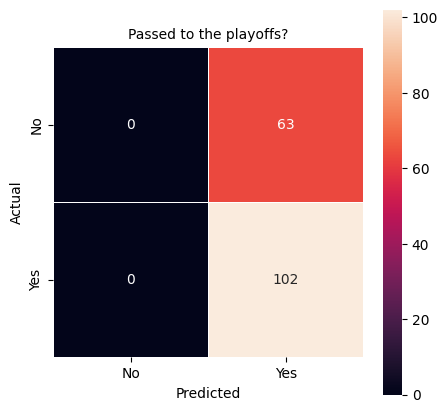

In [148]:
# SVM
svm = SVC(kernel='linear')
svm.fit(train_inputs, train_labels)

y_pred = svm.predict(test_inputs)

# metrics for the SVM
accuracy = accuracy_score(test_labels, y_pred)
print(f"Accuracy: {accuracy:.2f}")
precision = metrics.precision_score(test_labels, y_pred)
print(f"Precision: {precision:.2f}")
recall = metrics.recall_score(test_labels, y_pred)
print(f"Recall: {recall:.2f}")
f1 = metrics.f1_score(test_labels, y_pred)
print(f"F1: {f1:.2f}")

# plot the confusion matrix
confusion = confusion_matrix(test_labels, y_pred)

plt.figure(figsize=(5,5))
sb.heatmap(confusion, annot=True, fmt="g", linewidths=.5, square = True, xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
all_sample_title = 'Passed to the playoffs?'

plt.title(all_sample_title, size = 10)
plt.show()

## 2º Try - Team Performance in Consideration

In [44]:
## create an empty dataframe without any column names, indices or data
df = pd.DataFrame()

## obtain the team IDS and year
team_ids = pd.read_sql("select tmID, year from teams", connection)
print(team_ids.head())

## iterate through each team and year
for index, row in team_ids.iterrows():
    ## obtain the team ID and year for each row
    team_id = row['tmID']
    year = row['year']
    
    query = "select tmID, year, avg(oRebounds), avg(dRebounds), avg(rebounds), avg(assists), avg(steals), avg(blocks), \
        avg(turnovers), avg(PF), avg(fgAttempted), avg(fgMade), avg(ftAttempted), avg(ftMade), avg(threeAttempted), avg(threeMade) \
        from players_teams where tmID = '" + team_id + "' and year = " + str(year) + ";"
        
    ## obtain the average stats for each team
    team_stats = pd.read_sql(query, connection)
    
    query = "select avg(weight), avg(height) from players_teams join players on players.bioID = players_teams.playerID \
        where tmID = '" + team_id + "' and year = " + str(year) + ";"
        
    ## obtain the average weight and height for each team
    team_weight_height = pd.read_sql(query, connection)
    
    ## add the average weight and height to the team stats
    team_stats['weight'] = team_weight_height['avg(weight)']
    team_stats['height'] = team_weight_height['avg(height)']
    
    # transform the NaN values to 0
    team_stats = team_stats.fillna(0)
    
    # include in the query the win and loss ratio
    query = "select tmID, year, won, lost, GP from teams where tmID = '" + team_id + "' and year = " + str(year) + ";"
    
    team_win_loss = pd.read_sql(query, connection)
    
    # obtain the win and loss ratio
    win_ratio = team_win_loss['won'] / team_win_loss['GP']
    loss_ratio = team_win_loss['lost'] / team_win_loss['GP']
    
    # add the win and loss ratio to the team stats
    team_stats['win_ratio'] = win_ratio
    team_stats['loss_ratio'] = loss_ratio
    
    query = "select count(pt.playerID) as num_player_awards from players_teams pt join awards_players ap on pt.playerID = ap.playerID \
        where pt.year = ap.year and pt.tmID = '" + team_id + "' and pt.year = " + str(year) + " group by pt.tmID, ap.year;"
        
    team_awards = pd.read_sql(query, connection)
    
    # add the number of player awards to the team stats
    team_stats['num_player_awards'] = team_awards['num_player_awards']
    
    # transform the NaN values to 0
    team_stats = team_stats.fillna(0)
    
    # obtain the number of coach awards
    query = "select count(coachID) as num_coach_awards from coaches join awards_players ap on coaches.coachID = ap.playerID \
        where coaches.year = ap.year and coaches.tmID = '" + team_id + "' and coaches.year = " + str(year) + " group by coaches.tmID, ap.year;"
        
    team_coach_awards = pd.read_sql(query, connection)
    
    # add the number of coach awards to the team stats
    team_stats['num_coach_awards'] = team_coach_awards['num_coach_awards']
    
    # transform the NaN values to 0
    team_stats = team_stats.fillna(0)
        
    query = "select tmID, year from teams where semis <> '' and tmID = '" + team_id + "' and year = " + str(year) + ";"
    semis = pd.read_sql(query, connection)
    
    # team reached semis
    if semis.empty:
        team_stats['semis'] = 0
    else:
        team_stats['semis'] = 1
        
    query = "select tmID, year from teams where finals <> '' and tmID = '" + team_id + "' and year = " + str(year) + ";"
    finals = pd.read_sql(query, connection)
    
    # team reached finals
    if finals.empty:
        team_stats['finals'] = 0
    else:
        team_stats['finals'] = 1
        
    query = "select playoff from teams where tmID = '" + team_id + "' and year = " + str(year) + ";"
    playoff = pd.read_sql(query, connection)
    
    # check if it's Y or N
    if playoff['playoff'][0] == 'Y':
        team_stats['playoff'] = 1
    else:
        team_stats['playoff'] = 0
        
    
    # append the stats to the dataframe
    df = df._append(team_stats, ignore_index=True)


  tmID  year
0  CHA     1
1  CLE     1
2  DET     1
3  HOU     1
4  IND     1


In [45]:
# encode the categorical columns

team_pairs = []
team_names = df["tmID"].values
df["tmID"] = labelEncoder.fit_transform(df["tmID"].astype('str'))   

team_pairs = set(zip(team_names, df["tmID"].values))

print(team_pairs)   
        
# remove the rows that have year = 10
train_df = df[df.year != 10]

# remove the rows that have year <> 10
test_df = df[df.year == 10]

# create the training labels and inputs
train_inputs = train_df.iloc[:, :-1].values
train_labels = train_df.iloc[:, -1].values

# create the testing labels and inputs
test_inputs = test_df.iloc[:, :-1].values
test_labels = test_df.iloc[:, -1].values

{('IND', 7), ('MIA', 9), ('PHO', 13), ('WAS', 19), ('LAS', 8), ('UTA', 18), ('CHI', 2), ('CON', 4), ('DET', 5), ('NYL', 11), ('SAC', 15), ('CHA', 1), ('MIN', 10), ('SEA', 17), ('SAS', 16), ('CLE', 3), ('HOU', 6), ('ORL', 12), ('POR', 14), ('ATL', 0)}


## Decision Tree Classifier

Accuracy: 0.8461538461538461
Precision: 0.8
Recall: 1.0
F1: 0.888888888888889
Confusion matrix:
[[3 2]
 [0 8]]


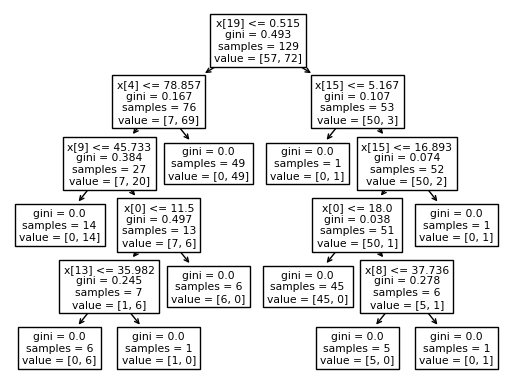

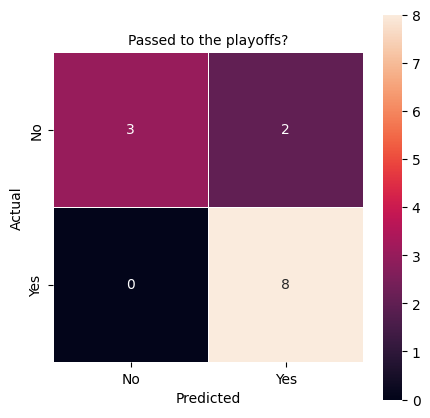

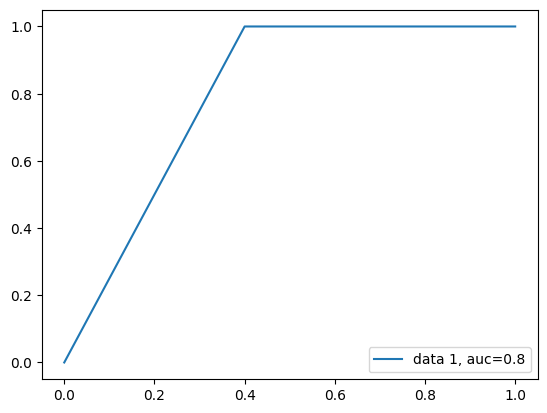

In [46]:
clf = DecisionTreeClassifier(random_state=1)
clf.fit(train_inputs,train_labels)


tree.plot_tree(clf)

# metrics for the decision tree
y_pred = clf.predict(test_inputs)
print("Accuracy:",metrics.accuracy_score(test_labels, y_pred))
print("Precision:",metrics.precision_score(test_labels, y_pred))
print("Recall:",metrics.recall_score(test_labels, y_pred))
print("F1:",metrics.f1_score(test_labels, y_pred))

# confusion matrix
confusion = confusion_matrix(test_labels, y_pred)
print(f"Confusion matrix:\n{confusion}")

#plot confusion matrix
plt.figure(figsize=(5,5))
sb.heatmap(confusion, annot=True, fmt="g", linewidths=.5, square = True, xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
all_sample_title = 'Passed to the playoffs?'
plt.title(all_sample_title, size = 10)
plt.show()

# roc curve
y_pred_proba = clf.predict_proba(test_inputs)[::,1]
fpr, tpr, _ = metrics.roc_curve(test_labels,  y_pred_proba)
auc = metrics.roc_auc_score(test_labels, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()


In [47]:
query = "select tmId, confID from teams where year = 10;"
teams_conf_ids = pd.read_sql(query, connection)

# print(teams_conf_ids)

west_teams = teams_conf_ids[teams_conf_ids["confID"] == "WE"]
east_teams = teams_conf_ids[teams_conf_ids["confID"] == "EA"]

# print(west_teams)
# print(east_teams)

# print the probabilities for each class
probs = clf.predict_proba(test_inputs)
probs_west = []
probs_east = []

for i in range(len(probs)):
    team_id = test_df["tmID"].values[i]
    
    # obtain the team name from the team_pairs
    team_name = [x[0] for x in team_pairs if x[1] == team_id]
    
    if team_name in west_teams["tmID"].values:
        probs_west.append((team_name[0], probs[i][1]))
        
    if team_name in east_teams["tmID"].values:
        probs_east.append((team_name[0], probs[i][1]))
    
    # print(f"{team_name[0]}: {probs[i][1]}")

probs_west = sorted(probs_west, key=lambda x: x[1], reverse=True)
probs_east = sorted(probs_east, key=lambda x: x[1], reverse=True)

print(probs_west)
print(probs_east)

[('LAS', 1.0), ('MIN', 1.0), ('PHO', 1.0), ('SAS', 1.0), ('SEA', 1.0), ('SAC', 0.0)]
[('ATL', 1.0), ('DET', 1.0), ('IND', 1.0), ('NYL', 1.0), ('WAS', 1.0), ('CHI', 0.0), ('CON', 0.0)]


## Logistic Regression

Accuracy: 0.77
Precision: 0.73
Recall: 1.00
F1: 0.84


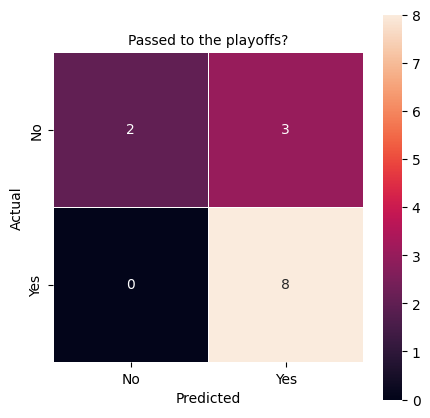

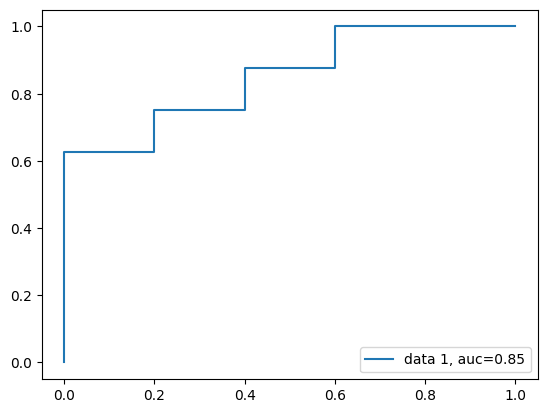

ATL: 0.9902272194034369
CHI: 0.8479862582075994
CON: 0.07178020081754805
DET: 0.5089090754752812
IND: 0.9019951711530235
LAS: 0.9949683867566664
MIN: 0.2593007419300438
NYL: 0.7514653791836169
PHO: 0.9964978701042921
SAC: 0.7926281612900807
SAS: 0.8165586052054212
SEA: 0.77103459055045
WAS: 0.9472903949444027
   tmID confID
0   ATL     EA
1   CHI     EA
2   CON     EA
3   DET     EA
4   IND     EA
5   LAS     WE
6   MIN     WE
7   NYL     EA
8   PHO     WE
9   SAC     WE
10  SAS     WE
11  SEA     WE
12  WAS     EA


In [38]:
logreg = LogisticRegression(max_iter=1000)
logreg.fit(train_inputs, train_labels)

y_pred = logreg.predict(test_inputs)

# metrics for the logistic regression
accuracy = accuracy_score(test_labels, y_pred)
print(f"Accuracy: {accuracy:.2f}")
precision = metrics.precision_score(test_labels, y_pred)
print(f"Precision: {precision:.2f}")
recall = metrics.recall_score(test_labels, y_pred)
print(f"Recall: {recall:.2f}")
f1 = metrics.f1_score(test_labels, y_pred)
print(f"F1: {f1:.2f}")

# plot the confusion matrix
confusion = confusion_matrix(test_labels, y_pred)

plt.figure(figsize=(5,5))
sb.heatmap(confusion, annot=True, fmt="g", linewidths=.5, square = True, xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
all_sample_title = 'Passed to the playoffs?'

plt.title(all_sample_title, size = 10)
plt.show()

# roc curve
y_pred_proba = logreg.predict_proba(test_inputs)[::,1]
fpr, tpr, _ = metrics.roc_curve(test_labels,  y_pred_proba)
auc = metrics.roc_auc_score(test_labels, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [43]:
query = "select tmId, confID from teams where year = 10;"
teams_conf_ids = pd.read_sql(query, connection)

# print(teams_conf_ids)

west_teams = teams_conf_ids[teams_conf_ids["confID"] == "WE"]
east_teams = teams_conf_ids[teams_conf_ids["confID"] == "EA"]

# print(west_teams)
# print(east_teams)

# print the probabilities for each class
probs = logreg.predict_proba(test_inputs)
probs_west = []
probs_east = []

for i in range(len(probs)):
    team_id = test_df["tmID"].values[i]
    
    # obtain the team name from the team_pairs
    team_name = [x[0] for x in team_pairs if x[1] == team_id]
    
    if team_name in west_teams["tmID"].values:
        probs_west.append((team_name[0], probs[i][1]))
        
    if team_name in east_teams["tmID"].values:
        probs_east.append((team_name[0], probs[i][1]))
    
    # print(f"{team_name[0]}: {probs[i][1]}")

probs_west = sorted(probs_west, key=lambda x: x[1], reverse=True)
probs_east = sorted(probs_east, key=lambda x: x[1], reverse=True)

print(probs_west)
print(probs_east)

[('PHO', 0.9964978701042921), ('LAS', 0.9949683867566664), ('SAS', 0.8165586052054212), ('SAC', 0.7926281612900807), ('SEA', 0.77103459055045), ('MIN', 0.2593007419300438)]
[('ATL', 0.9902272194034369), ('WAS', 0.9472903949444027), ('IND', 0.9019951711530235), ('CHI', 0.8479862582075994), ('NYL', 0.7514653791836169), ('DET', 0.5089090754752812), ('CON', 0.07178020081754805)]


## Naive Bayes

Accuracy: 0.85
Precision: 1.00
Recall: 0.75
F1: 0.86


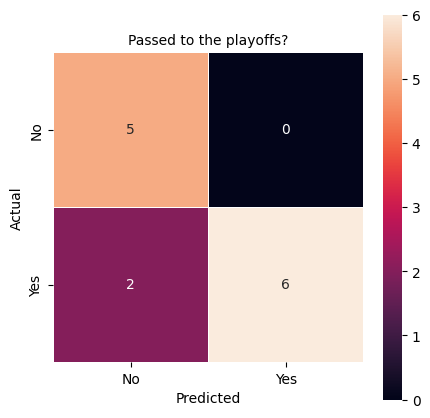

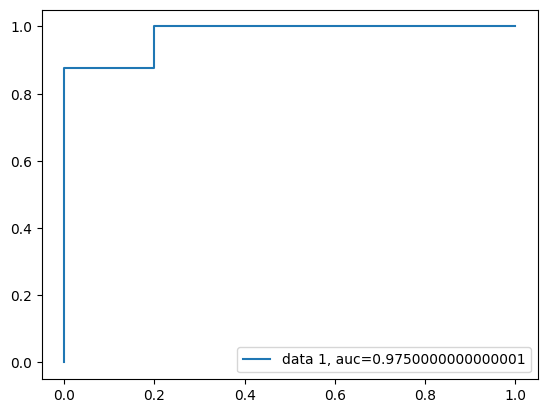

In [49]:
# Naive Bayes
gnb = GaussianNB()
gnb.fit(train_inputs, train_labels)

y_pred = gnb.predict(test_inputs)

# metrics for the naive bayes
accuracy = accuracy_score(test_labels, y_pred)
print(f"Accuracy: {accuracy:.2f}")
precision = metrics.precision_score(test_labels, y_pred)
print(f"Precision: {precision:.2f}")
recall = metrics.recall_score(test_labels, y_pred)
print(f"Recall: {recall:.2f}")
f1 = metrics.f1_score(test_labels, y_pred)
print(f"F1: {f1:.2f}")

# plot the confusion matrix
confusion = confusion_matrix(test_labels, y_pred)

plt.figure(figsize=(5,5))
sb.heatmap(confusion, annot=True, fmt="g", linewidths=.5, square = True, xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
all_sample_title = 'Passed to the playoffs?'

plt.title(all_sample_title, size = 10)
plt.show()

# roc curve
y_pred_proba = gnb.predict_proba(test_inputs)[::,1]
fpr, tpr, _ = metrics.roc_curve(test_labels,  y_pred_proba)
auc = metrics.roc_auc_score(test_labels, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [50]:
query = "select tmId, confID from teams where year = 10;"
teams_conf_ids = pd.read_sql(query, connection)

# print(teams_conf_ids)

west_teams = teams_conf_ids[teams_conf_ids["confID"] == "WE"]
east_teams = teams_conf_ids[teams_conf_ids["confID"] == "EA"]

# print(west_teams)
# print(east_teams)

# print the probabilities for each class
probs = gnb.predict_proba(test_inputs)
probs_west = []
probs_east = []

for i in range(len(probs)):
    team_id = test_df["tmID"].values[i]
    
    # obtain the team name from the team_pairs
    team_name = [x[0] for x in team_pairs if x[1] == team_id]
    
    if team_name in west_teams["tmID"].values:
        probs_west.append((team_name[0], probs[i][1]))
        
    if team_name in east_teams["tmID"].values:
        probs_east.append((team_name[0], probs[i][1]))
    
    # print(f"{team_name[0]}: {probs[i][1]}")

probs_west = sorted(probs_west, key=lambda x: x[1], reverse=True)
probs_east = sorted(probs_east, key=lambda x: x[1], reverse=True)

print(probs_west)
print(probs_east)

[('LAS', 1.0), ('PHO', 1.0), ('SAS', 0.9642897401889853), ('SEA', 0.0002135519011588801), ('MIN', 6.374284309518569e-08), ('SAC', 6.368671486021113e-11)]
[('ATL', 1.0), ('DET', 1.0), ('IND', 1.0), ('WAS', 0.0007916263477603561), ('NYL', 0.0005695613215748439), ('CHI', 4.715139417756596e-07), ('CON', 1.2592964537415036e-08)]


## Support Vector Machines

Accuracy: 0.69
Precision: 0.70
Recall: 0.88
F1: 0.78


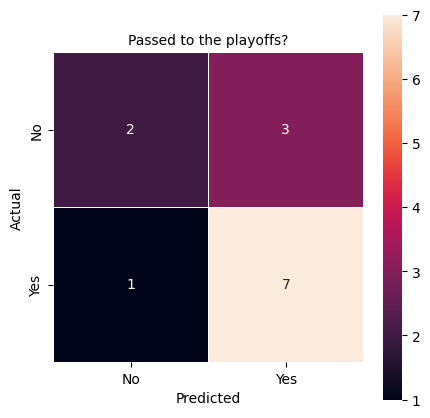

In [53]:
# SVM
svm = SVC(kernel='linear', probability=True)
svm.fit(train_inputs, train_labels)

y_pred = svm.predict(test_inputs)

# metrics for the SVM
accuracy = accuracy_score(test_labels, y_pred)
print(f"Accuracy: {accuracy:.2f}")
precision = metrics.precision_score(test_labels, y_pred)
print(f"Precision: {precision:.2f}")
recall = metrics.recall_score(test_labels, y_pred)
print(f"Recall: {recall:.2f}")
f1 = metrics.f1_score(test_labels, y_pred)
print(f"F1: {f1:.2f}")

# plot the confusion matrix
confusion = confusion_matrix(test_labels, y_pred)

plt.figure(figsize=(5,5))
sb.heatmap(confusion, annot=True, fmt="g", linewidths=.5, square = True, xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
all_sample_title = 'Passed to the playoffs?'

plt.title(all_sample_title, size = 10)
plt.show()


In [54]:
query = "select tmId, confID from teams where year = 10;"
teams_conf_ids = pd.read_sql(query, connection)

# print(teams_conf_ids)

west_teams = teams_conf_ids[teams_conf_ids["confID"] == "WE"]
east_teams = teams_conf_ids[teams_conf_ids["confID"] == "EA"]

# print(west_teams)
# print(east_teams)

# print the probabilities for each class
probs = svm.predict_proba(test_inputs)
probs_west = []
probs_east = []

for i in range(len(probs)):
    team_id = test_df["tmID"].values[i]
    
    # obtain the team name from the team_pairs
    team_name = [x[0] for x in team_pairs if x[1] == team_id]
    
    if team_name in west_teams["tmID"].values:
        probs_west.append((team_name[0], probs[i][1]))
        
    if team_name in east_teams["tmID"].values:
        probs_east.append((team_name[0], probs[i][1]))
    
    # print(f"{team_name[0]}: {probs[i][1]}")

probs_west = sorted(probs_west, key=lambda x: x[1], reverse=True)
probs_east = sorted(probs_east, key=lambda x: x[1], reverse=True)

print(probs_west)
print(probs_east)

[('PHO', 0.953761522844612), ('LAS', 0.9401635856382109), ('SEA', 0.684837198167171), ('SAC', 0.5758159376118522), ('SAS', 0.4636624261968742), ('MIN', 0.377562887419694)]
[('ATL', 0.9482829076615726), ('WAS', 0.8783960655566648), ('CHI', 0.7671915217671172), ('IND', 0.7141469840152502), ('NYL', 0.6709768467941611), ('DET', 0.6289928996539896), ('CON', 0.16536664583259583)]


# 3rd try - Based on the players perfomance

In [22]:
#create an empty dataframe without any column names, indices or data
df = pd.DataFrame()

query = "select players.*, year, stINTEGER ,tmID ,GP ,GS ,minutes ,points ,oRebounds ,dRebounds ,rebounds ,assists ,steals , \
    blocks ,turnovers ,PF ,fgAttempted ,fgMade ,ftAttempted ,ftMade ,threeAttempted ,threeMade ,dq from players \
    join players_teams on players.bioID = players_teams.playerID;"

players = pd.read_sql(query, connection)

# add the number of player awards to the player stats
players['num_player_awards'] = 0
query = "select playerID, count(playerID) as num_player_awards, year from awards_players group by playerID, year;"

player_awards = pd.read_sql(query, connection)

# add the number of player awards to the player stats
for index, row in player_awards.iterrows():
    player_id = row['playerID']
    year = row['year']
    num_player_awards = row['num_player_awards']
    
    players.loc[(players['bioID'] == player_id) & (players['year'] == year), 'num_player_awards'] = num_player_awards
    
# replace the column name stINTEGER with stint
players = players.rename(columns={"stINTEGER": "stint"})


In [ ]:
categorical_columns = ["tmID", "bioID", "pos", "college", "collegeOther"]

for col in categorical_columns:
    players[col] = labelEncoder.fit_transform(players[col].astype('str'))

# replace the birthDate with the birthYear
players["birthDate"] = (players["birthDate"].str[:4]).astype('int64')

# replace the deathDate with the deathYear
players["deathDate"] = (players["deathDate"].str[:4]).astype('int64')

# remove the rows that have year = 10
train_df = players[players.year != 10]

# remove the rows that have year <> 10
test_df = players[players.year == 10]

# obtain the number of columns
num_columns = len(train_df.columns)
print(num_columns)



In [35]:
# obtain the number of columns
num_columns = len(train_df.columns)
print(num_columns)

# create the training labels and inputs
train_inputs = train_df.iloc[:, :11].values
train_labels = train_df.iloc[:, 11:].values

# create the testing labels and inputs
test_inputs = test_df.iloc[:, :11].values
test_labels = test_df.iloc[:, 11:].values



31


## Logistic Regression

In [36]:
from sklearn.multioutput import MultiOutputRegressor


logreg = MultiOutputRegressor(LogisticRegression(multi_class="multinomial",max_iter=1000, solver="newton-cg"))
logreg.fit(train_inputs, train_labels)

y_pred = logreg.predict(test_inputs)

print(y_pred)


C:\Users\Utilizador\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
C:\Users\Utilizador\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


KeyboardInterrupt: 